In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
db = dm.read_db(base='global_20201006.pkl', add=[])

# Global sector model

In [503]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=5, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start='2010-12-31', 
    end='2020-09-30' 
)


14.547119140625


<Figure size 432x288 with 0 Axes>

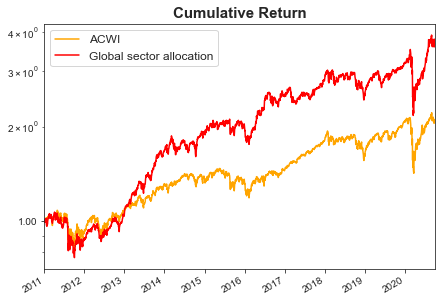

In [499]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [450]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Broker,2.51,2454,9.84,23.49,0.42,-40.38,13.33,17.83,0.73,1.14,27.94,63.79,0.90,79.97
Pharma,3.15,2454,12.39,19.94,0.62,-37.06,12.77,17.75,0.65,0.86,28.93,64.66,0.98,49.24
Wind,2.15,2454,8.09,21.59,0.37,-53.44,6.99,18.98,0.39,1.02,36.33,62.07,0.90,53.88
Cloud,4.73,2454,17.16,21.23,0.81,-33.00,15.88,16.91,0.84,1.02,10.16,65.52,1.11,94.82
DualMomentum,3.80,2454,14.59,20.55,0.71,-38.37,14.24,16.89,0.84,1.00,18.78,64.66,1.07,90.11


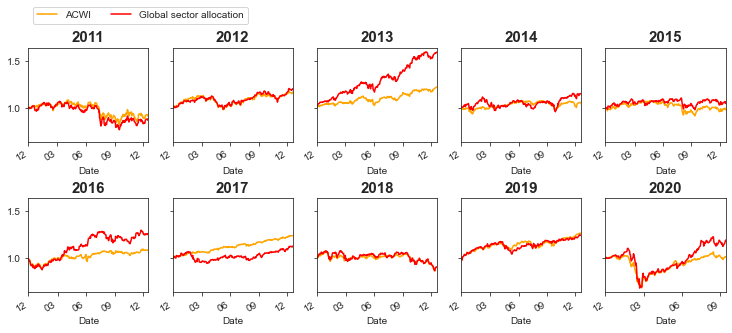

In [312]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

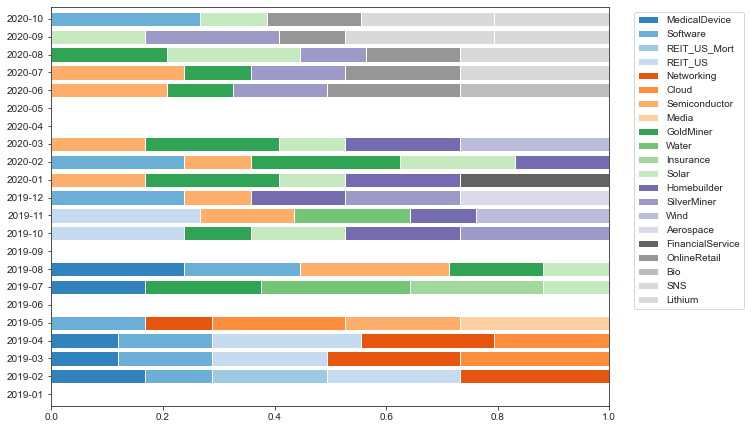

In [500]:
gsam.plot_weight([2019,2020]);

In [501]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

OnlineRetail    0.168714
Software        0.266760
Lithium         0.206631
Solar           0.119299
SNS             0.238597
Name: 2020-09-30 00:00:00, dtype: float64

# US factor model

In [3]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start='2010-12-31', 
    end='2020-09-30' 
)


5.531242847442627


<Figure size 432x288 with 0 Axes>

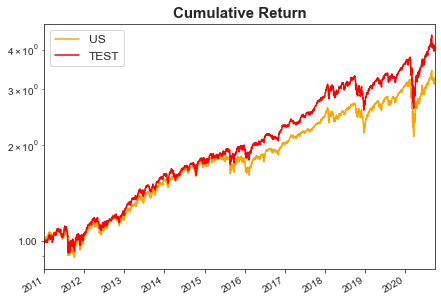

In [784]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [778]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Quality,3.38,2454,13.20,16.94,0.78,-34.06,13.83,12.54,1.08,0.92,4.58,68.10,1.08,97.18
Growth,4.08,2454,15.40,17.61,0.87,-31.35,16.04,13.66,1.16,0.95,4.54,67.24,1.19,97.79
US,3.24,2454,12.71,17.15,0.74,-33.72,14.71,12.81,1.12,0.95,6.98,71.55,0.86,96.82
Momentum,4.39,2454,16.26,18.19,0.89,-34.08,16.28,14.03,1.22,0.93,3.45,67.24,1.25,97.92
ACWI,2.11,2454,7.90,17.57,0.45,-33.53,9.83,13.61,0.69,1.00,23.31,65.52,0.87,90.42
Value,2.38,2454,9.23,17.61,0.52,-37.04,11.13,13.17,0.93,0.96,15.96,67.24,0.86,92.27
DualMomentum,4.13,2454,15.54,17.74,0.88,-31.02,15.68,13.57,1.15,0.94,3.54,65.52,1.27,98.00


In [530]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Growth    1.0
Name: 2020-09-30 00:00:00, dtype: float64

### Quality 기본 + 낙폭과대

In [131]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_6, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,-1,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='Quality', #'BND_US_Long', 
    cash_equiv='Quality', #'BND_US_Tbill', 
    start='2010-12-31', 
    end='2020-09-30' 
)


5.22703218460083


<Figure size 432x288 with 0 Axes>

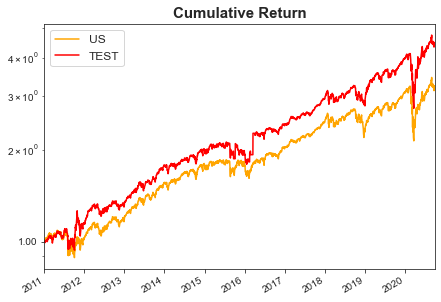

In [132]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [133]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Quality    1.0
Name: 2020-09-30 00:00:00, dtype: float64

<AxesSubplot:xlabel='Date'>

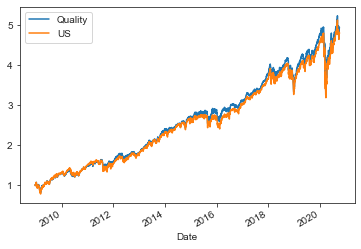

In [243]:
(ufam.p_close[['Quality','US']].iloc[:]/ufam.p_close[['Quality','US']].iloc[0]).plot()

# US-DM-EM model

In [140]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start='2010-12-31', 
    end='2020-09-30' 
)


5.444446086883545


<Figure size 432x288 with 0 Axes>

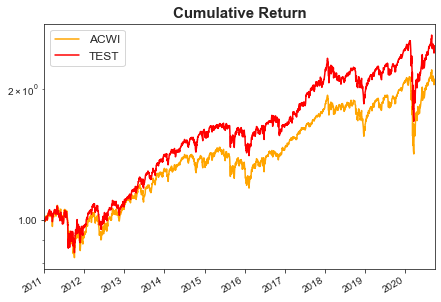

In [141]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [532]:
udem.weight.tail()

,Global,EM,ACWI,US_Total
2020-05-29,0.0,0.0,0.0,1.0
2020-06-30,0.0,0.0,0.0,1.0
2020-07-31,0.0,0.0,0.0,1.0
2020-08-31,0.0,0.0,0.0,1.0
2020-09-30,0.0,0.0,0.0,1.0


# Global country 낙폭과대

In [212]:
usm = q.Backtester(
    setting.base_params(db),
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_global_eq2, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,0,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start='2010-12-31', 
    end='2020-09-30'
)


6.559468030929565


<Figure size 432x288 with 0 Axes>

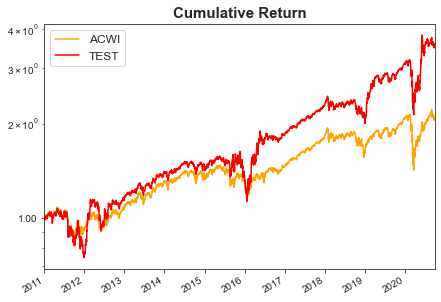

In [213]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

usm.plot_cum(strats, names=names, color=color, logy=True);

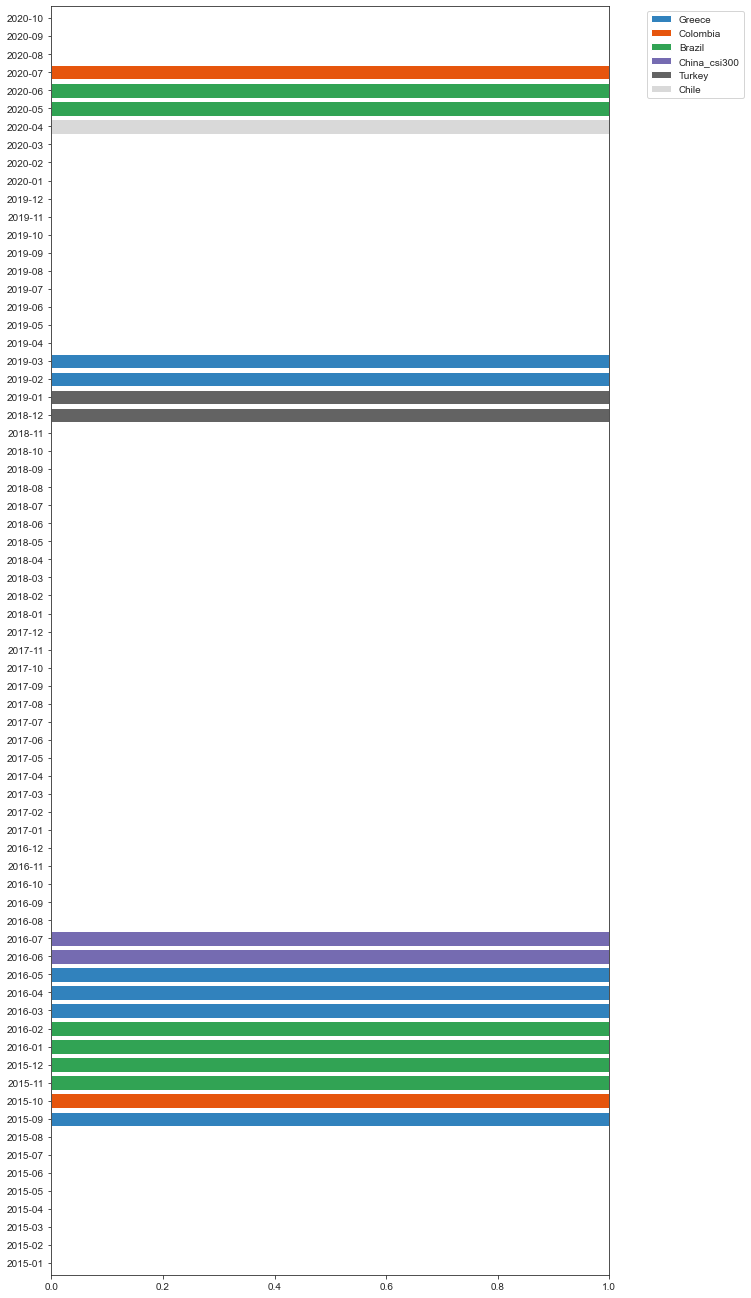

In [217]:
usm.plot_weight([2015,2020]);

<AxesSubplot:xlabel='Date'>

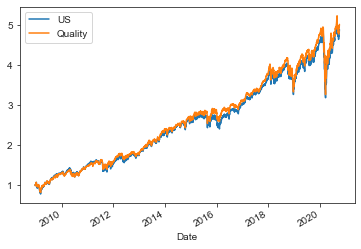

In [242]:
(db.reprice.unstack()[['US','Quality']].iloc[:]/db.reprice.unstack()[['US','Quality']].iloc[0]).plot()